<a href="https://colab.research.google.com/github/iesous-kurios/family_promise_data/blob/master/Hilary_Grant_Data_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This section imports functionality for this page.  
**This allows me to load and clean a raw output of our
Family Promise HMIS data, and also allows me to create graphs
or export data to excel sheets for connection to services
such as Power BI to provide visuals for our metrics**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

This section loads an excel file containing HMIS data

In [0]:
# load excel file containing HMIS data
df = pd.read_excel('/content/2018.xlsx')

In [0]:
# check recidivism
359 / 389

0.922879177377892

This section prints out how many total client IDs we served

In [0]:
df['5.8 Personal ID'].value_counts().sum()

866

This section prints how many unique client IDs are in the file

In [0]:
uniqueValues = df['5.8 Personal ID'].unique()
 
print('Unique elements in column "5.8 Personal ID" ')
print(len(uniqueValues))

Unique elements in column "5.8 Personal ID" 
763


This section contains code that manually adds up unique client IDs
This allows us to double-check the above assertion of total unique clientIDs

In [0]:
# Python program to check if two  
# to get unique values from list 
# using traversal  
  
# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list    
    
  
# driver code 
list1 = df['5.8 Personal ID']

unduplicated = unique(list1) 

In [0]:
len(unduplicated)

763

In [0]:
# this code asserts that the two different ways to calculate unique IDs came up 
# with the same answer

assert len(unduplicated) == len(uniqueValues)

# if there is an error after running this block, then that means the two answers
# are different (and there is a problem)  if the rest of the code runs fine then
# that means the two values are equal

In [0]:
# display how many total IDs are found in original file
df['5.8 Personal ID'].value_counts().sum()

866

In [0]:
# remove the duplicates
df = df.drop_duplicates(subset='5.8 Personal ID', keep='first')

In [0]:
# get new number of total IDs to make sure the code worked
df['5.8 Personal ID'].value_counts().sum()

763

In [0]:
# print total number of families served (unduplicated)
unique_households = unique(df['5.9 Household ID'])

In [0]:
# print total of unique household IDs
len(unique_households)

245

In [0]:
# double check unique households with another method
uniquehouseholds = df['5.9 Household ID'].unique()

len(uniquehouseholds)

245

In [0]:
# code to help break down guests by age groups

und_2 = [-1, 0, 1]
two_five = [2, 3, 4, 5]
six_twelve = [6, 7, 8, 9, 10, 11, 12]
thirteen_seventeen = [13, 14, 15, 16, 17]
eighteen_plus = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
                 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 
                 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
                 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 
                 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
                 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]

In [0]:
# assign guests of certain age groups to their prospective list

und_2_df = df['Age at Enrollment'].isin(und_2) == True
two_five_df = df['Age at Enrollment'].isin(two_five) == True
six_twelve_df = df['Age at Enrollment'].isin(six_twelve) == True
thirteen_seventeen_df = df['Age at Enrollment'].isin(thirteen_seventeen) == True
eighteen_plus_df = df['Age at Enrollment'].isin(eighteen_plus) == True

In [0]:
a = und_2_df.sum()

In [0]:
b = two_five_df.sum()

In [0]:
c = six_twelve_df.sum()

In [0]:
d = thirteen_seventeen_df.sum()

In [0]:
e = eighteen_plus_df.sum()

<BarContainer object of 5 artists>

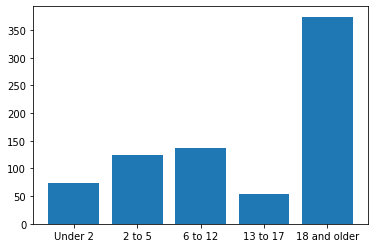

In [0]:
# list of age groups

lst = ['Under 2', '2 to 5', '6 to 12', '13 to 17', '18 and older'] 
  
# where to get total guests in age groups
lst2 = [a, b, c, d, e] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
age_breakdown = pd.DataFrame(list(zip(lst, lst2)), 
               columns =['Age Group', 'Total']) 

# print bar chart showing age breakdown
plt.bar(lst, lst2)


In [0]:
age_breakdown

,Age Group,Total
0,Under 2,74
1,2 to 5,124
2,6 to 12,137
3,13 to 17,54
4,18 and older,374


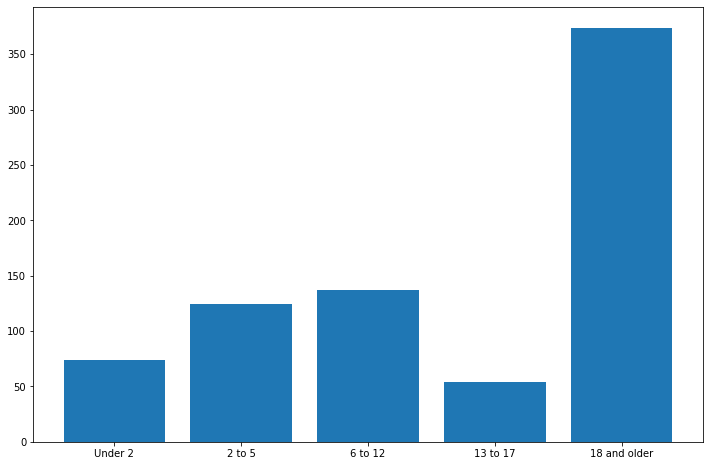

In [0]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = plt.bar(lst, lst2)

In [0]:
import plotly.express as px

In [0]:
px.bar(age_breakdown, x='Age Group', y='Total',  text='Total', title='Breakdown of Ages', color='Age Group')

In [0]:
# create error if count of personal ids is not equal to count of unduplicated client ids
assert df['5.8 Personal ID'].value_counts().sum() == len(unduplicated)

In [0]:
# create error if count of personal ids is not equal to the sume of all the different age groups
assert df['5.8 Personal ID'].value_counts().sum() == (und_2_df.sum() + two_five_df.sum() + six_twelve_df.sum() + thirteen_seventeen_df.sum() + eighteen_plus_df.sum())

In [0]:
# print median income of guests
print('Median income of guests for this time period: $',df['4.2 Income Total at Entry'].median())

Median income of guests for this time period: $ 750.0


In [0]:
# print mean income of guests 
print('Mean income of guests for this time period: $',round(df['4.2 Income Total at Entry'].mean(), 2))

Mean income of guests for this time period: $ 834.56


In [0]:
df['3.4 Race'].value_counts(normalize=True)

White                                        0.640420
American Indian or Alaska Native             0.122047
Black or African American                    0.083990
Multi-Racial                                 0.081365
Native Hawaiian or Other Pacific Islander    0.048556
Client refused                               0.015748
Asian                                        0.003937
Client doesn't know                          0.003937
Name: 3.4 Race, dtype: float64

In [0]:
df['3.4 Race'].value_counts()

White                                        488
American Indian or Alaska Native              93
Black or African American                     64
Multi-Racial                                  62
Native Hawaiian or Other Pacific Islander     37
Client refused                                12
Asian                                          3
Client doesn't know                            3
Name: 3.4 Race, dtype: int64

In [0]:
white_df = df['3.4 Race'].str.contains('White')
black_df = df['3.4 Race'].str.contains('Black or African American')
am_ind_df = df['3.4 Race'].str.contains('American Indian or Alaska Native')
multi_racial_df = df['3.4 Race'].str.contains('Multi-Racial')
native_amer_df = df['3.4 Race'].str.contains('Native Hawaiian or Other Pacific Islander')
client_refused_df = df['3.4 Race'].str.contains('Client Refused')
client_dnt_knw_df = df['3.4 Race'].str.contains("Client doesn't know")

In [0]:
f = white_df.sum()
g = black_df.sum()
h = am_ind_df.sum()
i = multi_racial_df.sum()
j = native_amer_df.sum()
k = client_refused_df.sum()
l = client_dnt_knw_df.sum()

In [0]:
# list of strings 

lst3 = ['White', 'Black or African American', 'American Indian or Alaska Native',
       'Multi-Racial', 'Native Hawaiian or Other Pacific Islander', 
       'Client refused', "Client doesn't know"] 
  
# list of int 
lst4 = [f, g, h, i, j, k, l] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
race_breakdown = pd.DataFrame(list(zip(lst3, lst4)), 
               columns =['Race', 'Total']) 

In [0]:
px.bar(race_breakdown, x='Race', y='Total',  text='Total', title='Breakdown of Races', color='Race')

In [0]:
non_his_lat_df = df['3.5 Ethnicity'].str.contains('Non-Hispanic/Latino')
his_lat_df = df['3.5 Ethnicity'].str.contains('Hispanic/Latino')
cli_ref_df = df['3.5 Ethnicity'].str.contains('Client refused')
cli_dnt_know_df = df['3.5 Ethnicity'].str.contains("Client doesn't know")

In [0]:
m = non_his_lat_df.sum()
n = his_lat_df.sum()
o = cli_ref_df.sum()
p = cli_dnt_know_df.sum()


In [0]:
# list of strings 

lst5 = ['White', 'Black or African American', 'American Indian or Alaska Native',
       'Multi-Racial', 'Native Hawaiian or Other Pacific Islander', 
       'Client refused', "Client doesn't know"] 
  
# list of int 
lst6 = [m, n, o, p] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
ethnic_breakdown = pd.DataFrame(list(zip(lst5, lst6)), 
               columns =['Ethnicity', 'Total']) 

In [0]:
px.bar(ethnic_breakdown, x='Ethnicity', y='Total',  text='Total', title='Breakdown of Ethnicity', color='Ethnicity')

In [0]:
df['3.5 Ethnicity'].value_counts(normalize=True)

Non-Hispanic/Latino    0.863517
Hispanic/Latino        0.122047
Client refused         0.013123
Data not collected     0.001312
Name: 3.5 Ethnicity, dtype: float64

In [0]:
df['3.5 Ethnicity'].value_counts()

Non-Hispanic/Latino    658
Hispanic/Latino         93
Client refused          10
Data not collected       1
Name: 3.5 Ethnicity, dtype: int64

In [0]:
# create list of exit reasons to combine into one major "exit to perm" list

exit_reasons = ['Rental by client with RRH or equivalent subsidy', 
                'Rental by client, no ongoing housing subsidy', 
                'Staying or living with family, permanent tenure', 
                'Rental by client, other ongoing housing subsidy',
                'Permanent housing (other than RRH) for formerly homeless persons', 
                'Staying or living with friends, permanent tenure', 
                'Owned by client, with ongoing housing subsidy', 
                'Staying or living with friends, permanent tenure', 
                'Rental by client, VASH housing Subsidy'
               ]
# same thing for temp housing
temp_reasons = ['Staying or living with family, temporary tenure (e.g., room, apartment or house)', 
               'Staying or living with friends, temporary tenure (e.g., room, apartment or house)', 
                
               ]

In [0]:
df['3.12 Exit Destination'].value_counts(normalize=True).to_excel('exit destinations by percent.xlsx')

In [0]:
#@title  { display-mode: "both" }
# pull all exit destinations from main data file and sum up the totals of each destination, placing them into new df for calculations
exits = df['3.12 Exit Destination'].value_counts()

tempExits = df['3.12 Exit Destination'].isin(temp_reasons)
temp_exit_percent = tempExits.sum() / exits.sum()
#exits.sum()) * 100)
# round tempExits to two decimals
tempExits = round(temp_exit_percent*100, 2)
#tempExits = 0

# take sum of unknown exits and divide by total exits, then multiply by 100 to get percentage
unknownExits = (((exits['Client refused']+exits['No exit interview completed']) 
                 / exits.sum()) * 100)

# round the answer to nearest hundreth place
unknownExits = (round(unknownExits, 2))

# create three data frames made up of the three key words found in perm housing
perm1 = df[df['3.12 Exit Destination'].str.contains('Rental') == True] 
perm2 = df[df['3.12 Exit Destination'].str.contains('permanent') == True]
perm3 = df[df['3.12 Exit Destination'].str.contains('Permanent') == True]

# merge the three dataframes into one to calculate exit to perm percent
perm_almost_final = perm1.append(perm2)
perm_final = perm_almost_final.append(perm3)
perm_final['3.12 Exit Destination'].value_counts()
perm_final_sums = perm_final['3.12 Exit Destination'].value_counts()
perm_final = df['3.12 Exit Destination'].isin(exit_reasons)
# calculate percentage of exits to perm
perm_final_percent = perm_final_sums.sum() / exits.sum()

#perm_final.sum()

#perm_final_percent2 = perm_final.sum() / df['3.12 Exit Destination'].value_counts().sum()
#round(perm_final_percent1, 2)
print('Exit to Perm percent:',round(perm_final_percent*100, 2),'%')
print('Unknown Exit percent:',unknownExits,'%')
print('Temp Exit percent:',tempExits,'%')

Exit to Perm percent: 30.01 %
Unknown Exit percent: 38.4 %
Temp Exit percent: 6.03 %


In [0]:
27.4+37.73+4.73

69.86

In [0]:
#@title

avgBedNights = df['Count of Bed Nights (Housing Check-ins)'].mean(skipna=True)

avgBedNights = round(avgBedNights, 2)

print("Average BedNights is:", avgBedNights)

Average BedNights is: 26.66


In [0]:
df.columns

Index(['2.1 Organization Name', '2.2 Project Name', '2.4 ProjectType',
       '2.5 Utilization Tracking Method (Invalid)',
       '2.6 Federal Grant Programs', 'Enrollment Created By', '3.1 FirstName',
       '3.1 LastName', '5.8 Personal ID', '5.9 Household ID',
       ...
       '4.2.9g Private Disability Income', '4.2.10h Workers Compensation',
       '4.2.11i TANF', '4.2.12j General Assistance',
       '4.2.13k Retirement (Social Security)',
       '4.2.14l Pension from a Former Job', '4.2.15m Child Support',
       '4.2.16n Alimony', '4.2.17o Other Income',
       '4.2.18 Total Monthly Income'],
      dtype='object', length=147)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df['Date'] = pd.to_datetime(df['3.10 Enroll Date'], infer_datetime_format=True)
quat1 = pd.to_datetime('2018-04-01')
quat2 = pd.to_datetime('2018-07-01')
quat3 = pd.to_datetime('2018-10-01')
quat4 = pd.to_datetime('2018-12-31')
quat_1 = df[df.Date < quat1]
quat_2 = df[(df['Date'] > quat1) & (df['Date'] < quat2)] 
quat_3 = df[(df['Date'] > quat2) & (df['Date'] < quat3)] 
quat_4 = df[df['Date'] > quat3] 

In [0]:
def served(X):
  X = X.copy()
  return(X['5.8 Personal ID'].value_counts().sum())


In [0]:
def served_h(X):
  X = X.copy()
  return(X['5.9 Household ID'].value_counts().unique().sum())


In [0]:
df['5.9 Household ID'].value_counts().unique().sum()

55

In [0]:
df['5.8 Personal ID'].value_counts().unique().sum()

1

In [0]:
uno = served(quat_1)
uno_h = served_h(quat_1)

In [0]:
dos = served(quat_2)
dos_h = served_h(quat_2)

In [0]:
tres = served(quat_3)
tres_h = served_h(quat_3)

In [0]:
quatro = served(quat_4)
quatro_h = served_h(quat_4)

In [0]:
df['5.8 Personal ID'].value_counts().sum()

763

In [0]:
print("Total Served 2018 quarter 1:", uno, 'individuals &', uno_h, 'households')
print("Total Served 2018 quarter 2:", dos, 'individuals &', dos_h, 'households')
print("Total Served 2018 quarter 3:", tres, 'individuals &', tres_h, 'households')
print("Total Served 2018 quarter 4:", quatro, 'individuals &', quatro_h, 'households')


Total Served 2018 quarter 1: 212 individuals & 28 households
Total Served 2018 quarter 2: 157 individuals & 22 households
Total Served 2018 quarter 3: 171 individuals & 38 households
Total Served 2018 quarter 4: 216 individuals & 39 households


In [0]:
df['month'] = pd.DatetimeIndex(df['3.10 Enroll Date']).month
df['year'] = pd.DatetimeIndex(df['3.10 Enroll Date']).year

In [0]:
df.year.value_counts()

2018    697
2017     66
Name: year, dtype: int64

In [0]:
df['3.10 Enroll Date'].head(1)

0   2017-09-10
Name: 3.10 Enroll Date, dtype: datetime64[ns]

In [0]:
#df_zips = pd.read_excel('/content/zipmaster.xlsx')

In [0]:
df_zips

In [0]:
merged = pd.merge(df, df_zips, on='V5 Zip')

In [0]:
merged.shape

In [0]:
df.shape

In [0]:
merged.County.value_counts(normalize=True)

In [0]:
merged.County.value_counts()

In [0]:
merged.City.value_counts()

In [0]:
merged.City.value_counts(normalize=True)

Like Qtr 1 (Jan-Mar), QTr 2 (Apr-Jun), Qtr 3 (Jul-Sep), and Qtr 4(Oct-Dec)

 1/1/17 - 12/31/17 & 1/1/18 - 10/31/18?